# Create Test Dictionary

The purpose of this notebook is to create a dictionary of fuel moisture scenarios for model testing.

[USGS](https://water.usgs.gov/edu/activity-howmuchrain-metric.html#:~:text=Slight%20rain%3A%20Less%20than%200.5,than%208%20mm%20per%20hour.) classifies rainfall as:
* Slight: $\text{rain}<.5$ mm/hr
* Moderate: $.5<\text{rain}<4$ mm/hr
* Heavy: $4<\text{rain}<8$ mm/hr
* Very Heavy: $8<\text{rain}$ mm/hr

## Setup

In [1]:
import numpy as np, random
from numpy.random import rand
import matplotlib.pyplot as plt
from data_funcs import synthetic_data, plot_data, to_json, from_json

from moisture_models import model_decay, model_moisture
from datetime import datetime, timedelta
import json
from utils import hash2

In [2]:
# Set seed for reproduciblity
random.seed(123)

def synthetic_data(days=20,power=4,data_noise=0.02,process_noise=0.0,
    DeltaE=0.0,Emin=5,Emax=30,p_rain=0.01,max_rain=10.0):
    hours = days*24
    h2 = int(hours/2)
    hour = np.array(range(hours))
    day = np.array(range(hours))/24.
    # artificial equilibrium data
    E = np.power(np.sin(np.pi*day),power) # diurnal curve betwen 0 and 1
    E = Emin+(Emax - Emin)*E
    E = E + DeltaE
    Ed=E+0.5
    Ew=np.maximum(E-0.5,0)
    rain = np.multiply(rand(hours) < p_rain, rand(hours)*max_rain)
    # FMC free run
    m_f = np.zeros(hours)
    m_f[0] = 0.1         # initial FMC
    # process_noise=0.
    for t in range(hours-1):
        m_f[t+1] = max(0.,model_moisture(m_f[t],Ed[t-1],Ew[t-1],rain[t-1])  + random.gauss(0,process_noise))
    m_f = m_f + np.random.normal(loc=0,scale=data_noise,size=hours)
    dat = {'E':E,'Ew':Ew,'Ed':Ed,'m_f':m_f,'hours':hours,'h2':h2,'DeltaE':DeltaE,'rain':rain,'title':'Synthetic data'}
    
    return dat

---

**Scenarios 1-6**: simulated moisture with default equilibrium parameters. Vary rain from none up to very heavy as described above.

In [3]:
# Dictionary to be saved for testing
test_dict = {}

In [4]:
## Case 1: no rain
synt_dat=synthetic_data(max_rain = 0) 
synt_dat['id'] = 1
synt_dat['title'] = 'Synthetic Data (no rain)'
synt_dat['descr'] = 'Max rain: 0 mm/hr; Emin: 5; Emax: 30; 20 days'

test_dict['case1'] = synt_dat # save to test dictionary

In [5]:
## Case 2: light rain
synt_dat=synthetic_data(max_rain = 0.4) 
synt_dat['id'] = 2
synt_dat['title'] = 'Synthetic Data (light rain)'
synt_dat['descr'] = 'Max rain: .4 mm/hr; Emin: 5; Emax: 30; 20 days'

test_dict['case2'] = synt_dat # save to test dictionary

In [6]:
## Case 3: moderate rain
synt_dat=synthetic_data(max_rain = 3) 
synt_dat['id'] = 3
synt_dat['title'] = 'Synthetic Data (med. rain)'
synt_dat['descr'] = 'Max rain: 3 mm/hr; Emin: 5; Emax: 30; 20 days'

test_dict['case3'] = synt_dat # save to test dictionary

In [7]:
## Case 4: heavy rain
synt_dat=synthetic_data(max_rain = 6) 
synt_dat['id'] = 4
synt_dat['title'] = 'Synthetic Data (heavy rain)'
synt_dat['descr'] = 'Max rain: 6 mm/hr; Emin: 5; Emax: 30; 20 days'

test_dict['case4'] = synt_dat # save to test dictionary

In [8]:
## Case 5: very heavy rain 1
synt_dat=synthetic_data(max_rain = 10) 
synt_dat['id'] = 5
synt_dat['title'] = 'Synthetic Data (very heavy rain 1)'
synt_dat['descr'] = 'Max rain: 10 mm/hr; Emin: 5; Emax: 30; 20 days'

test_dict['case5'] = synt_dat # save to test dictionary

In [9]:
## Case 6: very heavy rain 2
synt_dat=synthetic_data(max_rain = 15) 
synt_dat['id'] = 6
synt_dat['title'] = 'Synthetic Data (very heavy rain 2)'
synt_dat['descr'] = 'Max rain: 15 mm/hr; Emin: 5; Emax: 30; 20 days'

test_dict['case6'] = synt_dat # save to test dictionary

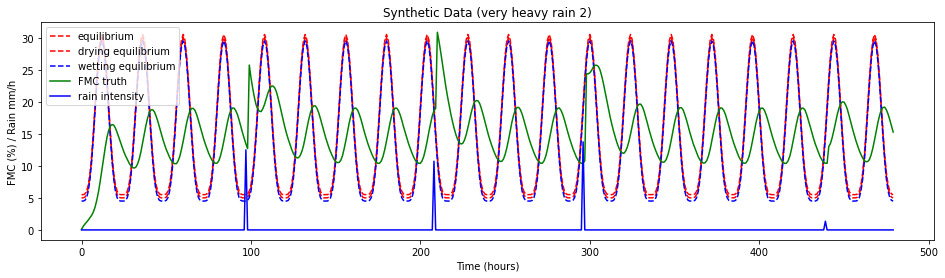

In [10]:
plot_data(test_dict['case6'])

In [11]:
test_dict.keys()

dict_keys(['case1', 'case2', 'case3', 'case4', 'case5', 'case6'])

---

**Scenario X:** RAWS Data

---

**Scenario X:** RTMA Data 

## Save Output

Pickle or json?

In [ ]:
# import pickle
# with open('testing_dict.pickle', 'wb') as handle:
#     pickle.dump(test_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)